## Replication for "Asymmetry by Design", November 22, 2020
### By Adam Goldstein and Charlie Eaton

### Appendix Figure A7: Event studies for schools that rebrand without ownership change

In [1]:
*ssc install gr0070



  Variables that uniquely identify margins: multiSwitchyearDiff


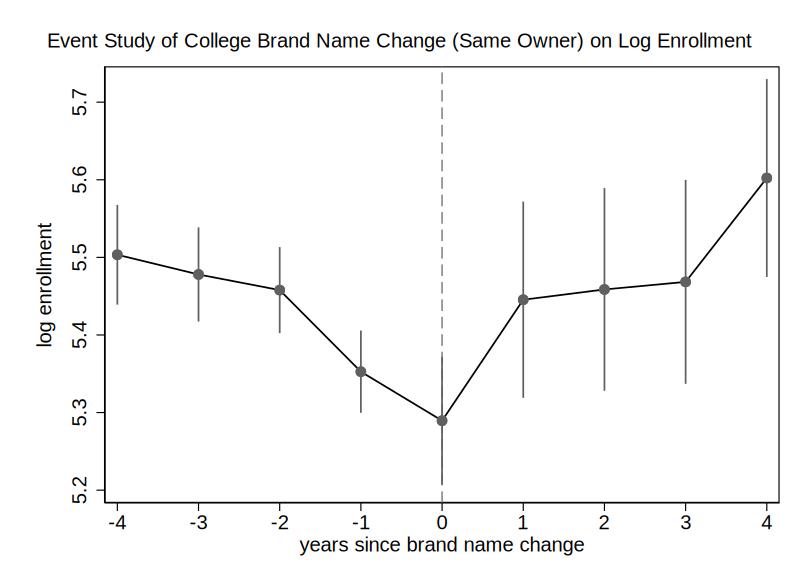


  Variables that uniquely identify margins: multiSwitchyearDiff


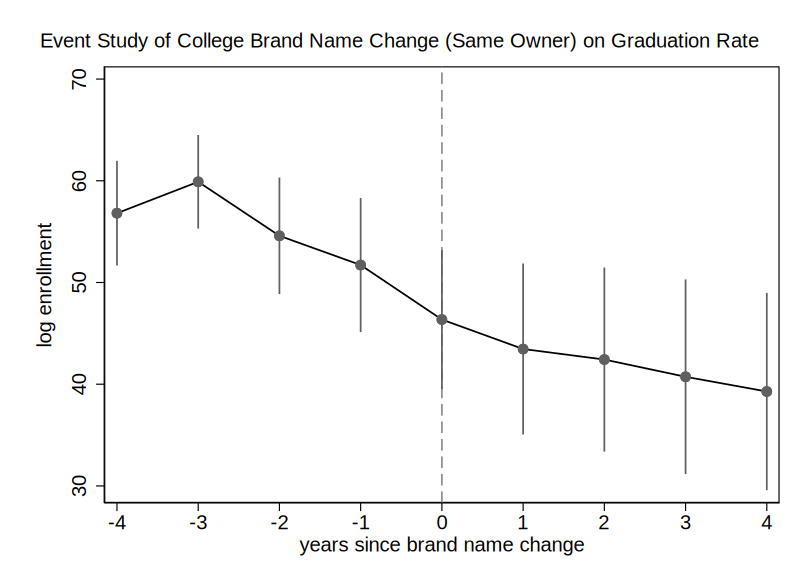

In [2]:
quietly {
quietly set scheme s1mono
    
quietly use data/d_unitidasymmetry, clear
 
xtset unitid year
 
****************
****************

sort unitid year
 
by unitid: gen name_change_sameowner=1 if name_first7!=name_first7[_n-1] & systemid==l.systemid & systemid==l2.systemid & l.systemid<99999999999 

sort unitid year
by unitid: carryforward name_change_sameowner if systemid==l.systemid, replace
gsort unitid -year
by unitid: replace name_change_sameowner=0 if name_change_sameowner[_n-1]==1
gsort unitid -year
by unitid: replace name_change_sameowner=0 if name_change_sameowner[_n-1]==0

sort unitid year

replace name_change_sameowner=. if year==2016

**Event study with controls and year-fixed effects

sort unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if name_change_sameowner==1 & l.name_change_sameowner==0
**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen multiSwitchyearall = min(transition)
**generate a var for the number of years relative to the year of the event (e.g. + or - 2 years)
gen multiSwitchyearDiff= year-multiSwitchyearall
**bin up year differences larger than absolute value of 5**
replace multiSwitchyearDiff =4 if multiSwitchyearDiff <9999 & multiSwitchyearDiff >3
replace multiSwitchyearDiff =-4 if multiSwitchyearDiff <-3 & multiSwitchyearDiff >-6
replace multiSwitchyearDiff=. if multiSwitchyearDiff<=-6
replace multiSwitchyearDiff = multiSwitchyearDiff+4

label define multiSwitchyearDiff 0 "-4" 1 "-3" 2 "-2" 3 "-1" 4 "0" 5 "1" 6 "2" 7 "3" 8 "4"
label val multiSwitchyearDiff multiSwitchyearDiff

reghdfe total_enrollment_log b4.multiSwitchyearDiff i.iclevel online dpcttype* , absorb(unitid year) 
margins i.multiSwitchyearDiff
marginsplot, ciopts(recast(rspike)) xline(4, lcolor(gs9) lpattern(dash)) title("Event Study of College Brand Name Change (Same Owner) on Log Enrollment", size(medsmall) margin(medsmall)) xtitle(years since brand name change)  ytitle(log enrollment, margin(medsmall))
graph export figures/fa7a_asymmetryrebrandenrollment.pdf, replace

reghdfe grad_rate_150_p_w b5.multiSwitchyearDiff online i.iclevel dpcttype* , absorb(unitid year) 
margins i.multiSwitchyearDiff
marginsplot, ciopts(recast(rspike)) xline(4, lcolor(gs9) lpattern(dash)) title("Event Study of College Brand Name Change (Same Owner) on Graduation Rate", size(medsmall) margin(medsmall)) xtitle(years since brand name change)  ytitle(log enrollment, margin(medsmall))
graph export figures/fa7b_asymmetryrebrandgraduation.pdf, replace
}